<a href="https://colab.research.google.com/github/Kim-Yeonjoo/DeepLearning/blob/main/6_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)  # 자주 쓰는 단어 수 최대 만개

In [28]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [29]:
len(train_data[0])

218

In [30]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [31]:
train_labels[0]   # 긍정1 / 부정 0 > 이진분류

1

In [32]:
max([max(sequence) for sequence in train_data])

9999

In [33]:
# 리뷰 데이터를 영어 단어로 바꾸기
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [ (value, key) for (key, value) in word_index.items() ]
)
decoded_review = " ".join( [ reverse_word_index.get(i, "?") for i in train_data[0] ] )

decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

# 데이터 준비

In [34]:
# 리스트 -> 텐서 -> 백터 변경
import numpy as np

## 피처의 단어번호를 원핫인코딩 처리
def vectorize_sequences( sequences, dimension=10000 ):
  results = np.zeros( (len(sequences), dimension ) )
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.    ## 원핫인코딩
    print(results[0], results[0].shape)
    return results

## 백터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

[0. 1. 1. ... 0. 0. 0.] (10000,)
[0. 1. 1. ... 0. 0. 0.] (10000,)


In [35]:
# 라벨
train_labels[:5]

array([1, 0, 0, 1, 0])

In [36]:
# 라벨 타입 변경
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 모델 구성

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

# 틀 만들기 (built=False)
model = keras.Sequential(
    [
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')    # 스칼라 0,1 사이의 확률
    ]
)

model

<Sequential name=sequential_2, built=False>

In [38]:
# 모델 속성 지정(컴파일)
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# 훈련

In [39]:
# 훈련을 위한 데이터 셋 분류
x_val = x_train[:10000]   # 검증용
partial_x_train = x_train[10000:]  # 훈련용

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data = (x_val, y_val)
          )

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.4960 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5050 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5034 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5033 - loss: 0.6931 - val_accuracy: 0.4948 - 

In [41]:
# adam 비교해 보기
model_1 = keras.Sequential(
    [
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')    # 스칼라 0,1 사이의 확률
    ]
)

model_1.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history_1 = model_1.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data = (x_val, y_val)
          )

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.4938 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5013 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5073 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5072 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5041 - loss: 0.6931 - val_accuracy: 0.4947 - v

# 검증

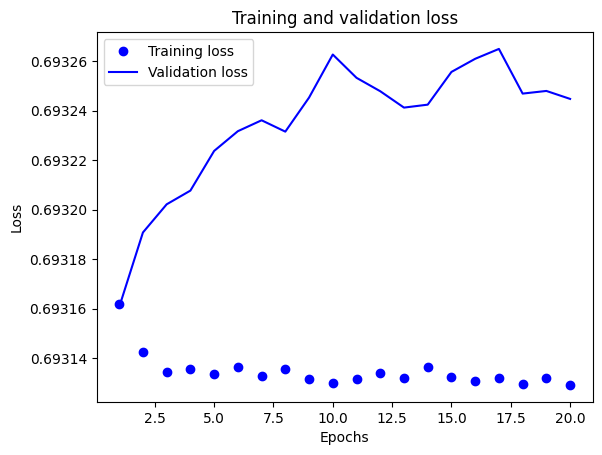

In [42]:
# loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

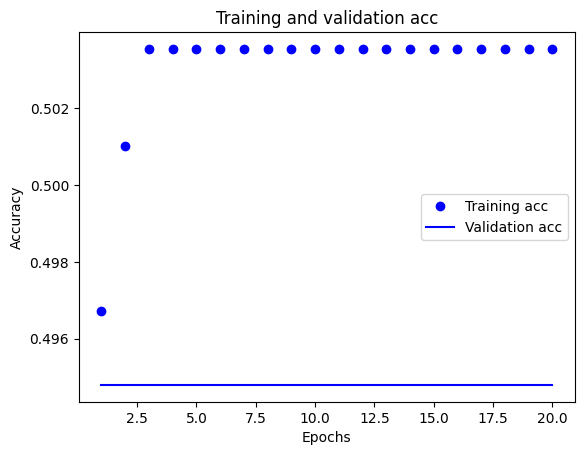

In [44]:
# accuracy
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training acc")
plt.plot(epochs, val_loss_values, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 모델 구성 조정 > 검증데이터 수행

In [45]:
model_new = keras.Sequential(
    [
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')    # 스칼라 0,1 사이의 확률
    ]
)

model_new

<Sequential name=sequential_4, built=False>

In [46]:
model_new.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [47]:
history_new = model_new.fit(partial_x_train, partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data = (x_val, y_val)
          )

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5051 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5024 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6933


# 모델 구성 조정 > 전체 훈련데이터 수행

In [48]:
model_new_1 = keras.Sequential(
    [
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')    # 스칼라 0,1 사이의 확률
    ]
)

model_new_1

<Sequential name=sequential_5, built=False>

In [49]:
model_new_1.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [50]:
history_new_1 = model_new_1.fit(x_train, y_train,
          epochs=4,
          batch_size=512
          )

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5018 - loss: 0.6932
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5006 - loss: 0.6932
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4997 - loss: 0.6932
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5041 - loss: 0.6931


# 새로운 데이터로 평가

In [51]:
model_new_1.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.49465734],
       [0.4996521 ],
       [0.4996521 ],
       ...,
       [0.4996521 ],
       [0.4996521 ],
       [0.4996521 ]], dtype=float32)

# 추가 실험

In [52]:
model_ex = keras.Sequential(
    [
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')    # 스칼라 0,1 사이의 확률
    ]
)

model_ex

<Sequential name=sequential_6, built=False>

In [53]:
model_ex.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [54]:
model_ex.fit(x_train, y_train,
          epochs=4,
          batch_size=512
          )

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5016 - loss: 0.6932
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4908 - loss: 0.6932
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4947 - loss: 0.6932
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4990 - loss: 0.6931


In [55]:
model_ex_1 = keras.Sequential(
    [
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')    # 스칼라 0,1 사이의 확률
    ]
)

model_ex_1

<Sequential name=sequential_7, built=False>

In [56]:
model_ex_1.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [57]:
model_ex_1.fit(x_train, y_train,
          epochs=4,
          batch_size=512
          )

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.4984 - loss: 0.6932
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.4985 - loss: 0.6932
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.4987 - loss: 0.6932
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4982 - loss: 0.6932


In [58]:
model_ex_2 = keras.Sequential(
    [
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')    # 스칼라 0,1 사이의 확률
    ]
)

model_ex_2

<Sequential name=sequential_8, built=False>

In [59]:
model_ex_2.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [60]:
model_ex_2.fit(x_train, y_train,
          epochs=4,
          batch_size=512
          )

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.4945 - loss: 0.6932
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.5001 - loss: 0.6932
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4960 - loss: 0.6932
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5013 - loss: 0.6931


In [61]:
model_ex_3 = keras.Sequential(
    [
        layers.Dense(4, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')    # 스칼라 0,1 사이의 확률
    ]
)

model_ex_3

<Sequential name=sequential_9, built=False>

In [62]:
model_ex_3.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [63]:
model_ex_3.fit(x_train, y_train,
          epochs=4,
          batch_size=512
          )

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5008 - loss: 0.6932
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4910 - loss: 0.6932
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5042 - loss: 0.6931
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4935 - loss: 0.6932
